In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
from IPython.display import HTML
style="<style>svg{width:50% !important; height=70% !important;}</style>"
HTML(style)

test task

In [6]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [8]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
5,3,3,4,0,2,1,0,1,0,1,...,6,6,0,2,1,0,7,4,4,1
6,0,3,8,1,5,1,0,0,8,0,...,7,7,0,2,2,4,5,4,3,1
7,3,3,2,0,8,1,0,1,0,1,...,7,6,0,2,1,0,7,4,4,1
8,5,2,8,0,5,1,1,0,7,1,...,7,7,0,2,1,0,2,3,1,0
9,5,0,3,0,1,1,0,1,2,0,...,7,7,0,2,1,4,3,4,0,1


In [10]:
y_train = df['class']

In [11]:
x_train = df.drop(['class'], axis=1)

In [13]:
np.random.seed(0)

clf_rf = RandomForestClassifier(10, max_depth=5)

params = {'n_estimators':[10,20,30, 40, 50], 'max_depth':[1,3,5,7,9,11,12], 'min_samples_leaf':[1,2,3,4,5,6,7],
         'min_samples_split':[2,4,6,8,9]}
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5, n_jobs=-1)
grid_search_cv_clf.fit(x_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [1, 3, 5, 7, 9, 11, 12], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7], 'min_samples_split': [2, 4, 6, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:

grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [18]:

be = grid_search_cv_clf.best_estimator_

In [19]:
be.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [ ]:
best_est.feature_importances_

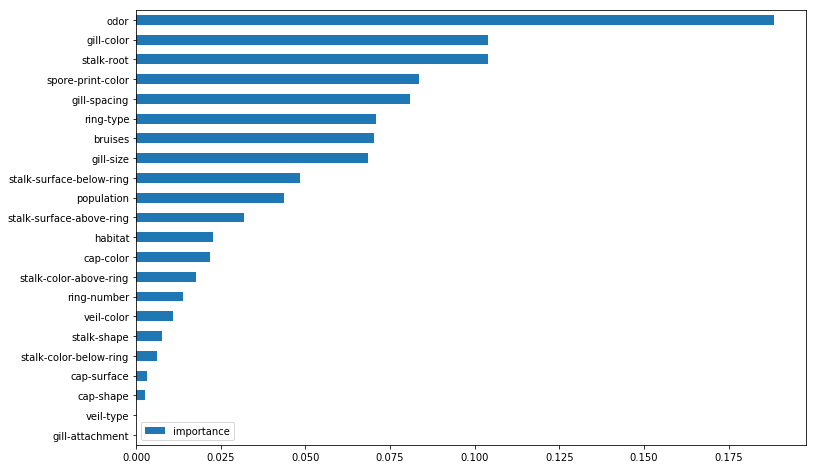

In [21]:
imp = pd.DataFrame(best_est.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [23]:
test_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [27]:
test_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [31]:
res = best_est.predict(test_df)

In [32]:
dataset = pd.DataFrame({'Column1':res})


In [39]:
dataset.query('Column1 == 1').count()

Column1    976
dtype: int64

In [41]:
correct_answers = pd.read_csv('testing_y_mush.csv')

In [43]:
correct_answers.head(5)

,class
0,0
1,0
2,1
3,1
4,1


In [45]:
> from sklearn.metrics import confusion_matrix
>>> y_true = [2, 0, 2, 2, 0, 1]
>>> y_pred = [0, 0, 2, 2, 0, 2]
>>> confusion_matrix(y_true, y_pred)
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

SyntaxError: invalid syntax (<ipython-input-45-f96f0221bc16>, line 1)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(correct_answers, dataset)

array([[1055,    0],
       [   0,  976]])